## Titanic: Machine Learning from Disaster

So, this is my first published notebook. I'm going to try to get the most of the training dataset to better understand the data. The focus of this notebook is to go through somethings I learned while studying data visualization in Python. There's a high chance that these codes aren't as pythonic as they are supposed to be, but I'll try my best to write some clean code. 

**Obs:** Critiques and tips are very welcome.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
%matplotlib inline

In [44]:
df = pd.read_csv("../input/titanic/train.csv")

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Notes
* There are 891 records on the dataset.
* There is missing information on the following columns: **Age**, **Cabin** and **Embarked**.

In [47]:
# This fuctions is used a few times to display bar values in barplots
def show_values_on_bars(axs, *args, **kwargs):
    """
    Function based on Sharon Soussan answer for:
    https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    This function will help display information over some plots.
    """
    
    def _show_on_single_plot(ax):        
        
        if 'stacked' in kwargs:
            if kwargs['stacked'] == True:
                first_bar = sorted([x.get_height() for x in axs.patches[:] if x.get_x() < 0], reverse=True)
                second_bar = sorted([x.get_height() for x in axs.patches[:] if x.get_x() > 0], reverse=True)

        for p in ax.patches:
            
            _x = p.get_x() + p.get_width() / 2
            
            if 'stacked' in kwargs:
                # This will work only for the sex/pclass plot. I will try to improve this in the future.
                if kwargs['stacked'] == True:
                    n = ax.patches.index(p)
                    if p.get_x() < 0:
                        bar = first_bar
                    else:
                        bar = second_bar
                    pos = bar.index(p.get_height())
                    if pos % 3 == 0:
                        _y = (bar[pos] - bar[pos + 1])/2 + bar[pos + 1] - 14
                        value = bar[pos] - bar[pos + 1]
                    elif pos % 3 == 1:
                        _y = (bar[pos] - bar[pos + 1])/2 + bar[pos + 1] - 14
                        value = bar[pos] - bar[pos + 1]
                    elif pos % 3 == 2:
                        _y = bar[pos] / 2 - 14
                        value = bar[pos]
                        
            elif 'height' in kwargs:
                _y = kwargs['height']
                value = f'{p.get_height()}'
            else:
                _y = 10
                value = f'{p.get_height()}'
            ax.text(_x, _y, value, fontsize=14, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(axs)
    else:
        _show_on_single_plot(axs)

In [48]:
# Setting the style for my plots
sns.set_style(style='ticks')

## Visualization based on 'Sex'

Some plots related to **Sex**. Let's check if 'women and children' firsts was a thing.

In [49]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 0.98, 'Sex')

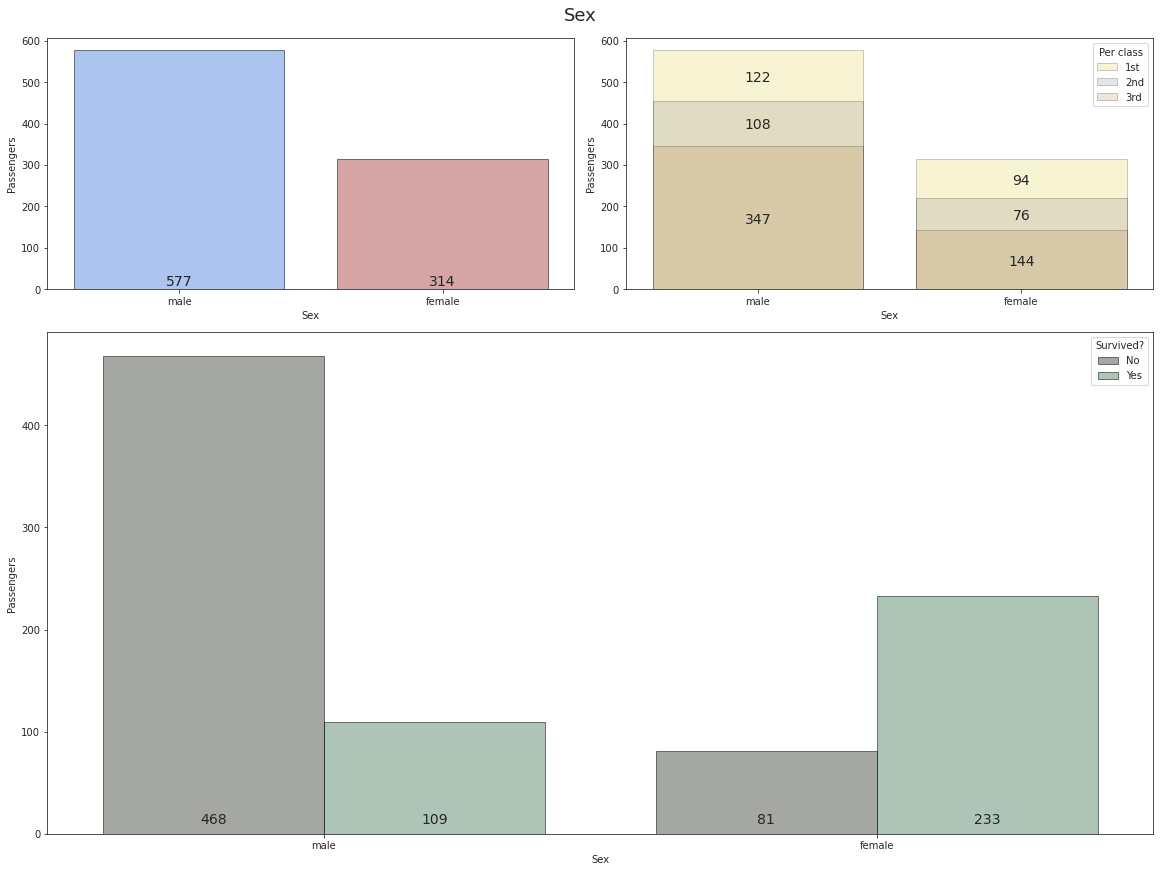

In [50]:
# Color palettes for sex plots:
sex_palette = sns.color_palette(["#4287f5", "#bd3c3c"])
pclass_palette = sns.color_palette(["#FFDF00", "#c0c0c0", "#cd7f32"])
survived_palette = sns.color_palette(["#4e5245", "#57916c"])

fig = plt.figure(figsize=(16,12), constrained_layout=True)
gs = gridspec.GridSpec(nrows=3, ncols=4, figure=fig)


# Male/Female Totals
ax1 = fig.add_subplot(gs[0:1, 0:2])
sns.countplot(x='Sex', data=df, palette=sex_palette, edgecolor=sns.color_palette(["#000"]), alpha=0.5)
show_values_on_bars(ax1)
plt.ylabel('Passengers')

# Sex per class
ax2 = fig.add_subplot(gs[0:1, 2:])
sns.countplot(x = 'Sex', data=df, color = "#FFDF00", edgecolor=sns.color_palette(["#000"]), alpha=0.2)
sns.countplot(x = 'Sex', data=df[(df['Pclass'] == 2) | (df['Pclass'] == 3)], color='#808080', edgecolor=sns.color_palette(["#000"]), alpha=0.2)
sns.countplot(x = 'Sex', data=df[df['Pclass'] == 3], color = "#cd7f32", edgecolor=sns.color_palette(["#000"]), alpha=0.2)
plt.ylabel('Passengers')
# sns.countplot(x='Sex', hue='Pclass', data=df, edgecolor=sns.color_palette(["#000"]), palette=pclass_palette, alpha=0.5)
plt.legend(title='Per class', labels=['1st', '2nd', '3rd'])
show_values_on_bars(ax2, stacked=True)
plt.ylabel('Passengers')

# Survivors by sex
ax3 = fig.add_subplot(gs[1:3, 0:4])
sns.countplot(x='Sex', hue='Survived', data=df, edgecolor=sns.color_palette(["#000"]), palette=survived_palette, alpha=0.5)
plt.legend(title='Survived?', labels=['No', 'Yes'])
show_values_on_bars(ax3)
plt.ylabel('Passengers')

fig.suptitle('Sex', fontsize=18)

## Visualization based on 'Parch' and 'SibSp'

To better approach these columns, I decided to add both, considering the following given information:

* **sibsp:** The dataset defines family relations in this way...

    Sibling = brother, sister, stepbrother, stepsister
    
    Spouse = husband, wife (mistresses and fiancés were ignored)
    

* **parch:** The dataset defines family relations in this way...

    Parent = mother, father

    Child = daughter, son, stepdaughter, stepson
    

So, for the sake of the data visualization: **'Family'** = **'Parch'** + **'SibSp'**

**PS:** On a future notebook, I'll check if this is the best approach.

In [51]:
df['Family'] = df['Parch'] + df['SibSp']

In [52]:
df['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

Text(0.5, 0.98, 'Passengers Family')

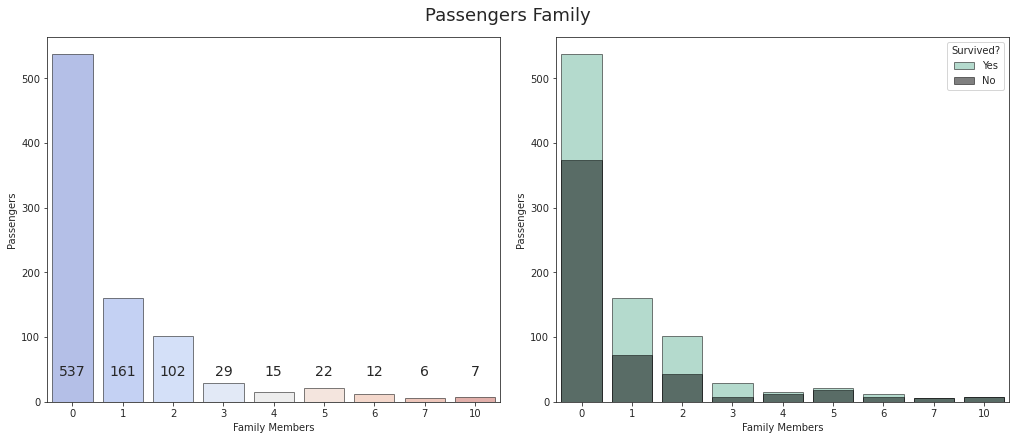

In [53]:
fig = plt.figure(figsize=(14,6), constrained_layout=True)
gs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(x='Family', data=df, palette='coolwarm', edgecolor=sns.color_palette(["#000"]), alpha=0.5)
show_values_on_bars(ax1, height=40)
plt.xlabel('Family Members')
plt.ylabel('Passengers')

ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(x = 'Family', data=df, color = "#5ec4a1", edgecolor=sns.color_palette(["#000"]), alpha=0.5)
sns.countplot(x = 'Family', data=df[df['Survived'] == 0], color = "black", edgecolor=sns.color_palette(["#000"]), alpha=0.5)
plt.xlabel('Family Members')
plt.ylabel('Passengers')
plt.legend(title='Survived?', labels=['Yes', 'No'])

fig.suptitle('Passengers Family', fontsize=18)

## Visualization based on 'Age'

Before applying data visualization techniques on the **Age** column, I decided to fill the 177 missing data records to have a more completed dataset.

**PS:** On a future notebook, I'll check if this is the best approach.

In [54]:
# Filling na with age mean so there's no missing data on the 'Age' column
df['Age'].fillna(value=df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [55]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

Text(0.5, 0.98, 'Age')

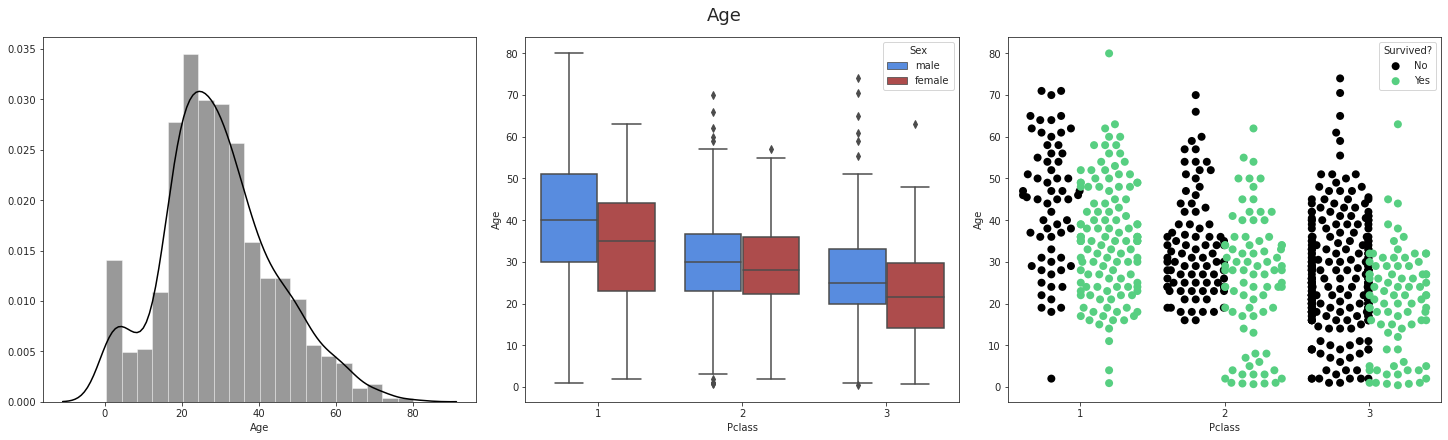

In [56]:
# Color palettes for age plots:
sex_palette = sns.color_palette(["#4287f5", "#bd3c3c"])
pclass_palette = sns.color_palette(["#FFDF00", "#c0c0c0", "#cd7f32"])
survived_palette = sns.color_palette(["#000", "#57cf81"])

fig = plt.figure(figsize=(20,6), constrained_layout=True)
gs = gridspec.GridSpec(nrows=1, ncols=3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
sns.distplot(df['Age'], color='#000')

ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df, palette=sex_palette)

ax3 = fig.add_subplot(gs[0, 2])
sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=df, palette=survived_palette, size=8, dodge=True)
plt.legend(title='Survived?', labels=['No', 'Yes'])

fig.suptitle('Age', fontsize=18)

## Correlation

Before using the heatmap over correlation, I'll give binary/ordinal representations to **Sex** and **Embarked** columns to check if there's any correlation between them and the **Survived** data.

In [57]:
df['SexB'] = df['Sex'].map({'male': 1,'female': 0})
df['EmbarkedNum'] = df['Embarked'].map({'S': 0,'C': 1, 'Q': 2})

Text(0.5, 1.0, 'Correlation')

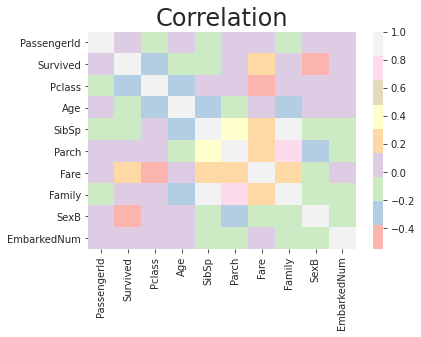

In [58]:
sns.heatmap(df.corr(), cmap='Pastel1')
plt.title('Correlation', fontsize=24)

## Conclusions (so far)

Here are somethings I concluded by analysing the plots:

* Sex and Class matter to decide rather people would live or die (if you were a first-class woman, you'd probably survive);
* Age and Class are related (e.g. people in first class trend to be older than people in third class);
* Class and Fare are related (as expected, people in 1st class paid more for their tickets);
* Parch and SibSp doesn't appear to make such a difference to tell who survived or not.

I'll try to apply some machine learning algorithms on this dataset so I can learn more about it and maybe find more patterns.

## Bonus: Geographic Plots
The following charts don't matter for the analysis as a whole, I was just trying to train my geographical plot skills and I used some of the dataset information (and Googled a little more) to create figures somehow interesting.

In [59]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [60]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [61]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [62]:
data = dict(type = 'choropleth',
           colorscale = 'portland',
           locations = ['Great Britain', 'France', 'Ireland'],
           locationmode = 'country names',
           z = [df['Embarked'].value_counts()['S'], df['Embarked'].value_counts()['C'], df['Embarked'].value_counts()['Q']],
           colorbar = {'title': 'Number of people'})
layout = dict(title = 'Where people embarked on Titanic', geo = dict(scope = 'europe', showlakes = True, lakecolor='rgb(85, 173, 240)')
             )
choromap = go.Figure(data=[data], layout=layout)
iplot(choromap)

In [63]:
# C = Cherbourg (France) - Cordinates = (49.648793, -1.617686)
# Q = Queenstown/Cohb (Ireland) - Coordinates = (51.85033600, -8.29416667) 
# S = Southampton (England) - Coordinates = (50.90969800, -1.40416667)
# Titanic sinking coordinates - Coordinates = (41.7325, -49.9469)

name = ['Southampton', 
        'Cherbourg', 
        'Queenstown', 
        'Sinking']

pos = [[50.90969800, -1.40416667, 'Southampton', 1],
      [49.648793, -1.617686, 'Cherbourg', 2],
      [51.85033600, -8.29416667, 'Queenstown', 3],
      [41.7325, -49.9469, 'Titanic\'s Sinking', 4]]

pos_df = pd.DataFrame(pos, index=name, columns=['lat', 'lon', 'name', 'animation'])


fig = px.line_mapbox(pos_df, lat="lat", lon="lon", zoom=3, height=500, hover_data=['name'])
fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=2.8, mapbox_center_lat = 48, mapbox_center_lon = -27,
    margin={"r":0,"t":0,"l":0,"b":0}, title='Titanic\'s Path')